In [123]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

import os
import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.python.client import device_lib
print(os.device_encoding)
os.environ["CUDA_VISIBLE_DEVICES"]='0'

# print(device_lib.list_local_devices())
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

model_name = "mobilenet_v3_large_075_224" # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/feature_vector/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/feature_vector/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/feature_vector/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/feature_vector/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300, 
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}


model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 224)
# 픽셀 고정 224  변동시 모델 컴파일 불가

print(f"Selected model: {model_name} : {model_handle}")

IMAGE_SIZE = (pixels, pixels)

BATCH_SIZE =  16
print(f"Input size {IMAGE_SIZE}", 'last')


2.6.0
<built-in function device_encoding>
TF version: 2.6.0
Hub version: 0.12.0
GPU is NOT AVAILABLE
Selected model: mobilenet_v3_large_075_224 : https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5
Input size (224, 224) last


In [124]:
beans_dir = 'C:/Users/y2363/OneDrive/Desktop/Tic/archive/train_transform/'
valid_dir = 'C:/Users/y2363/OneDrive/Desktop/Tic/archive/valid_transform/'

def build_dataset(subset, data_dir):
  return tf.keras.preprocessing.image_dataset_from_directory(
      data_dir,
      validation_split=0.2,
      subset=subset,
      label_mode="categorical",
      # Seed needs to provided when using validation_split and shuffle = True.
      # A fixed seed is used so that the validation set is stable across runs.
      seed=123,
      image_size=IMAGE_SIZE,
      batch_size=1)

train_ds = build_dataset("training",beans_dir)
class_names = tuple(train_ds.class_names)
train_size = train_ds.cardinality().numpy()
train_ds = train_ds.unbatch().batch(BATCH_SIZE)
train_ds = train_ds.repeat()

# val_ds = build_dataset("training",valid_dir)
# class_names = tuple(train_ds.class_names)
# val_size = train_ds.cardinality().numpy()
# val_ds = train_ds.unbatch().batch(BATCH_SIZE)
# val_ds = train_ds.repeat()

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1. / 255)
preprocessing_model = tf.keras.Sequential([normalization_layer])
do_data_augmentation = False
if do_data_augmentation:
  preprocessing_model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(40))
  preprocessing_model.add(tf.keras.layers.experimental.preprocessing.RandomTranslation(0, 0.2))
  preprocessing_model.add(tf.keras.layers.experimental.preprocessing.RandomTranslation(0.2, 0))
  # Like the old tf.keras.preprocessing.image.ImageDataGenerator(),
  # image sizes are fixed when reading, and then a random zoom is applied.
  # If all training inputs are larger than image_size, one could also use
  # RandomCrop with a batch size of 1 and rebatch later.
  preprocessing_model.add(tf.keras.layers.experimental.preprocessing.RandomZoom(0.2, 0.2))
  preprocessing_model.add(tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal"))
train_ds = train_ds.map(lambda images, labels:(preprocessing_model(images), labels))

val_ds = build_dataset("validation", valid_dir)
valid_size = val_ds.cardinality().numpy()
val_ds = val_ds.unbatch().batch(BATCH_SIZE)
val_ds = val_ds.map(lambda images, labels:(normalization_layer(images), labels))

# image_count = len(list(glob.glob(train_dir+'*/*.jpg')))
# print("image_count:", image_count)
print(train_ds)
print(val_ds, 'last')

print('valid_size', valid_size)
print('train_size', train_size)

Found 79125 files belonging to 3 classes.
Using 63300 files for training.
Found 16867 files belonging to 3 classes.
Using 3373 files for validation.
<MapDataset shapes: ((None, 224, 224, 3), (None, 3)), types: (tf.float32, tf.float32)>
<MapDataset shapes: ((None, 224, 224, 3), (None, 3)), types: (tf.float32, tf.float32)> last
valid_size 3373
train_size 63300


In [125]:
print("Building model with", model_handle)
do_fine_tuning = False
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(len(class_names),
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001),)
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9), 
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
    metrics=['accuracy'])
print(model, 'last')

Building model with https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1280)              2731616   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 3843      
Total params: 2,735,459
Trainable params: 3,843
Non-trainable params: 2,731,616
_________________________________________________________________
<keras.engine.sequential.Sequential object at 0x000001BEA0278490> last


In [126]:
steps_per_epoch = train_size // BATCH_SIZE
validation_steps = valid_size // BATCH_SIZE

hist = model.fit(
    train_ds, 
    steps_per_epoch=steps_per_epoch,
    validation_data=val_ds,
    validation_steps=validation_steps,
    epochs=15).history

Epoch 1/15
3956/3956 [==============================] - 1054s 266ms/step - loss: 0.4956 - accuracy: 0.8928 - val_loss: 0.4789 - val_accuracy: 0.9083
Epoch 2/15
3956/3956 [==============================] - 1209s 306ms/step - loss: 0.4777 - accuracy: 0.9034 - val_loss: 0.4717 - val_accuracy: 0.9128
Epoch 3/15
3956/3956 [==============================] - 1258s 318ms/step - loss: 0.4762 - accuracy: 0.9041 - val_loss: 0.4991 - val_accuracy: 0.8973
Epoch 4/15
3956/3956 [==============================] - 1218s 308ms/step - loss: 0.4762 - accuracy: 0.9039 - val_loss: 0.5193 - val_accuracy: 0.8827
Epoch 5/15
3956/3956 [==============================] - 1244s 314ms/step - loss: 0.4764 - accuracy: 0.9046 - val_loss: 0.5031 - val_accuracy: 0.8920
Epoch 6/15
3956/3956 [==============================] - 1172s 296ms/step - loss: 0.4757 - accuracy: 0.9058 - val_loss: 0.4899 - val_accuracy: 0.9018
Epoch 7/15
3956/3956 [==============================] - 1020s 258ms/step - loss: 0.4758 - accuracy: 0.9045

결과

Epoch 1/15

1786/1786 [==============================] - 629s 350ms/step - loss: 0.4284 - accuracy: 0.8577 - val_loss: 0.3826 - val_accuracy: 0.8918

Epoch 2/15

1786/1786 [==============================] - 606s 339ms/step - loss: 0.4025 - accuracy: 0.8776 - val_loss: 0.3804 - val_accuracy: 0.8945

Epoch 3/15

1786/1786 [==============================] - 606s 339ms/step - loss: 0.3981 - accuracy: 0.8811 - val_loss: 0.3590 - val_accuracy: 0.9078

Epoch 4/15

1786/1786 [==============================] - 603s 338ms/step - loss: 0.4001 - accuracy: 0.8793 - val_loss: 0.3642 - val_accuracy: 0.9092

Epoch 5/15

1786/1786 [==============================] - 617s 346ms/step - loss: 0.4003 - accuracy: 0.8803 - val_loss: 0.3541 - val_accuracy: 0.9105

Epoch 6/15

1786/1786 [==============================] - 614s 344ms/step - loss: 0.3974 - accuracy: 0.8803 - val_loss: 0.3719 - val_accuracy: 0.8956

Epoch 7/15

1786/1786 [==============================] - 602s 337ms/step - loss: 0.4013 - accuracy: 0.8782 - val_loss: 0.3791 - val_accuracy: 0.8887

Epoch 8/15

1786/1786 [==============================] - 573s 321ms/step - loss: 0.4006 - accuracy: 0.8786 - val_loss: 0.4052 - val_accuracy: 0.8717

Epoch 9/15

1786/1786 [==============================] - 573s 321ms/step - loss: 0.3991 - accuracy: 0.8803 - val_loss: 0.4422 - val_accuracy: 0.8491

Epoch 10/15

1786/1786 [==============================] - 581s 325ms/step - loss: 0.3980 - accuracy: 0.8795 - val_loss: 0.4215 - val_accuracy: 0.8594

Epoch 11/15

1786/1786 [==============================] - 574s 322ms/step - loss: 0.4003 - accuracy: 0.8777 - val_loss: 0.5292 - val_accuracy: 0.7988

Epoch 12/15

1786/1786 [==============================] - 570s 319ms/step - loss: 0.3993 - accuracy: 0.8793 - val_loss: 0.4270 - val_accuracy: 0.8588

Epoch 13/15

1786/1786 [==============================] - 593s 332ms/step - loss: 0.3986 - accuracy: 0.8844 - val_loss: 0.4943 - val_accuracy: 0.8238

Epoch 14/15

1786/1786 [==============================] - 756s 423ms/step - loss: 0.3989 - accuracy: 0.8810 - val_loss: 0.3821 - val_accuracy: 0.8882

Epoch 15/15

1786/1786 [==============================] - 732s 410ms/step - loss: 0.3984 - accuracy: 0.8832 - val_loss: 0.3516 - val_accuracy: 0.9145

In [141]:
import os
from tensorflow.python.keras.models import load_model
import h5py
model.save('beansNet')

INFO:tensorflow:Assets written to: beansNet\assets


INFO:tensorflow:Assets written to: beansNet\assets


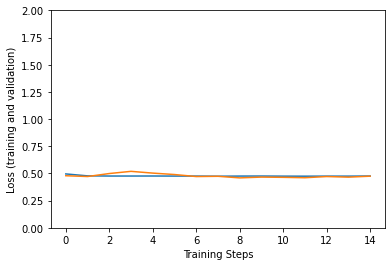

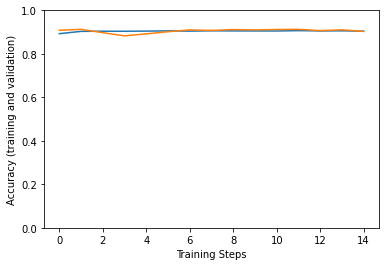

In [127]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

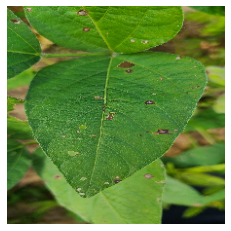

Predicted label: transform_bean_dot


In [139]:
x, y = next(iter(val_ds))
image = x[3, :, :, :]
#true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
#print("True label: " + class_names[true_index])
print("Predicted label: " + class_names[predicted_index])

In [149]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

pb_model_dir = "C:/Users/y2363/OneDrive/Desktop/Tic/beansNet.v2/"
h5_model = "C:/Users/y2363/OneDrive/Desktop/Tic/beansNet.v2/bean_model.h5"

# Loading the Tensorflow Saved Model (PB)
model = tf.keras.models.load_model(pb_model_dir)
print(model.summary())

# Saving the Model in H5 Format
tf.keras.models.save_model(model, h5_model)

# Loading the H5 Saved Model
loaded_model_from_h5 = tf.keras.models.load_model(h5_model)
print(loaded_model_from_h5.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1280)              2731616   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 3843      
Total params: 2,735,459
Trainable params: 3,843
Non-trainable params: 2,731,616
_________________________________________________________________
None


ValueError: Unknown layer: KerasLayer. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.